In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

none
low
med
high


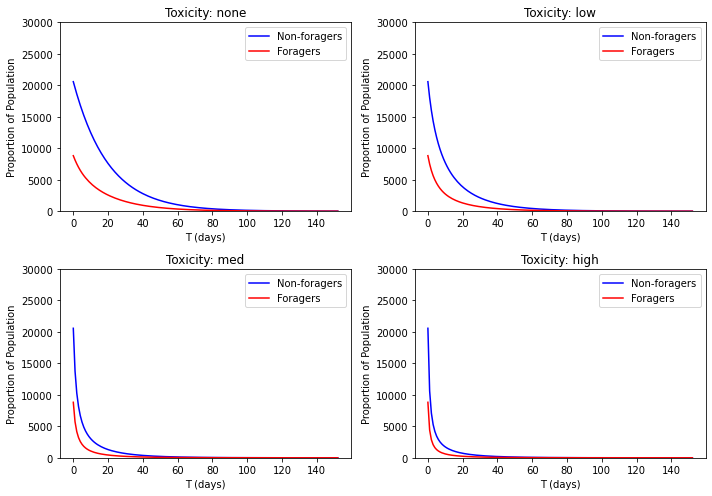

In [27]:
def ode_maker(tox):
    toxicity_levels = {'high': .0001,
                       'med': .00005,
                       'low': .00001,
                       'none': 0}
    b = 0 # birth rate
    c = 0.05 # prop of workers becoming foragers
    d = .2 # normal death rate of foragers
    k = .005 # rate of starvation
    q = toxicity_levels[tox] # rate of bees dying from acute or sublethal exposure to pesticides
    
    def ode(t, y):
        N = y[0] # non-forager workers
        F = y[1] # foragers
        return np.array([b - c*N - q*N*F,
                         c*N - d*F - q*F*F])
    return ode

# Set up initial values
total_hive_population = 30000
worker_bees = int(.98*30000)
non_foragers = worker_bees * .7
foragers = worker_bees * .3
y0 = np.array([non_foragers, foragers])
t0 = 0
tf = 153 # 153 is the number of days between May and October, when bees would be out foraging
t = np.arange(tf)

for i, toxicity in enumerate(['none', 'low', 'med', 'high']):
    print(toxicity)
    built_ode = ode_maker(toxicity)

    # Calculate ODE
    sol = solve_ivp(built_ode, (t0, tf), y0, t_eval=t)
    # Plot results
    plt.subplot(2, 2, i+1)
    plt.plot(t, sol.y[0], label='Non-foragers', color='blue')
    plt.plot(t, sol.y[1], label='Foragers', color='red')
    plt.ylabel('Proportion of Population')
    plt.xlabel('T (days)')
    plt.ylim(0,30000)
    plt.legend()
    plt.title('Toxicity: {}'.format(toxicity))
plt.gcf().set_size_inches(10, 7)
plt.tight_layout()
plt.show()

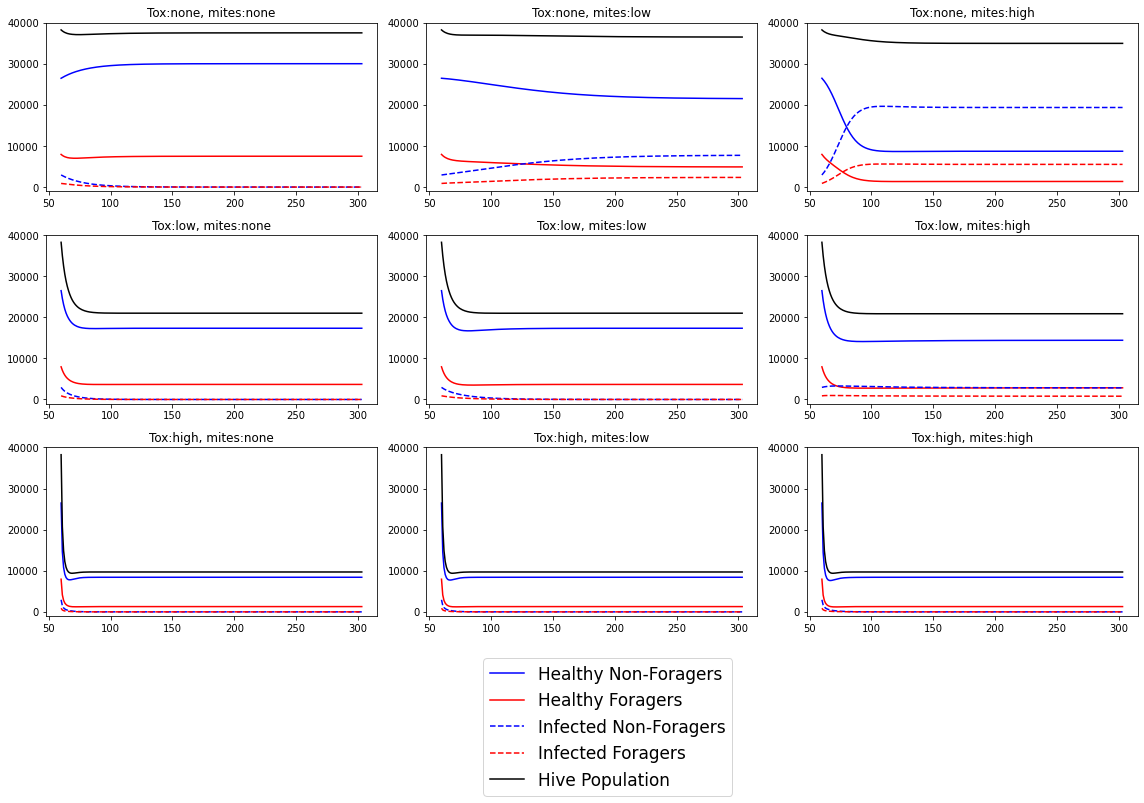

In [2]:
from scipy.integrate import solve_ivp

def ode_maker(tox, mites):
    toxicity_levels = {'high': 1e-4,
                       'low': 1e-5,
                       'none': 0}
    
    mite_levels = {'high': 5e-6,
                   'low': 2e-6,
                   'none': 0}
    
    b = 1500 # birth rate
    c = 0.05 # prop of workers becoming foragers (0.05 allows for most non-foragers to become foragers by 40)
    d = 0.2 # normal death rate of foragers (0.2 allows for most foragers to die after 10 days)
    
    q = toxicity_levels[tox] # rate of bees dying from acute or sublethal exposure to pesticides
    y = mite_levels[mites] #infection rate parasites
    w = 1e-3 #recovery rate parasites
    z = 5e-3 #death rate parasites

    def ode(t,y0):
        Hn = y0[0] #healthy nonforagers
        Hf = y0[1] #healthy foragers
        In = y0[2] #infected non-foragers
        If = y0[3] #infected non-foragers
        arr =  np.array([-c*Hn - y*(In+If)*Hn - q*(Hf+If)*Hn + w*In + b,
                          c*Hn - y*(In+If)*Hf - q*(Hf+If)*Hf + w*If - d*Hf,
                         -c*In + y*(In+If)*Hn - q*(Hf+If)*In - z*In - w*In,
                          c*In + y*(In+If)*Hf - q*(Hf+If)*If - z*If - w*If - d*If])
        return arr
    return ode

# initial conditions
hive_pop = 30000
workers = int(.98*hive_pop)
non_foragers = int(workers*.7)
foragers = int(workers*.3)

#suppose we start out with 10% of the hive infected with mites
initial_mite_outbreak = .1
Hn = workers*(1-initial_mite_outbreak)
Hf = foragers * (1 - initial_mite_outbreak)
In = workers * initial_mite_outbreak
If = foragers * initial_mite_outbreak

t0 = 60
tf = 304 # These start and end times model behavior for the summer
t = np.arange(t0, tf)
y0 = np.array([Hn, Hf, In, If])

i = 1
for tox in ['none', 'low', 'high']:
    for mites in ['none', 'low', 'high']:
        ODE = ode_maker(tox=tox, mites=mites)
        sol = solve_ivp(ODE, (t0, tf), y0, t_eval=t)
        
        plt.subplot(3, 3, i)
        plt.plot(t, sol.y[0],  c='blue', label = 'Healthy Non-Foragers')
        plt.plot(t, sol.y[1], c='red', label = 'Healthy Foragers')
        plt.plot(t, sol.y[2], c='blue', linestyle='--', label = 'Infected Non-Foragers')
        plt.plot(t, sol.y[3], c='red', linestyle='--', label = 'Infected Foragers')
        plt.plot(t, np.sum(sol.y,axis=0), c='black', label='Hive Population')
        plt.ylim(-1000, 40000)
        plt.title('Tox:{}, mites:{}'.format(tox, mites))
        i += 1

plt.gcf().set_size_inches(16, 9)
plt.tight_layout()
plt.legend(bbox_to_anchor=(-1.2, -1.2, 1, 1), prop={'size': 17})
plt.show()